# JOBS AND SALARIES IN DATA SCIENCE

work_year: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

job_title: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

job_category: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

salary_currency: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

salary_in_usd: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

experience_level: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

employment_type: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

work_setting: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

company_location: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

company_size: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv('jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [6]:
df.shape

(9355, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [8]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [52]:
df.describe

<bound method NDFrame.describe of       work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_u

In [9]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

As we can see from the above data we can conclude that we dnt have any null values in the dataset.

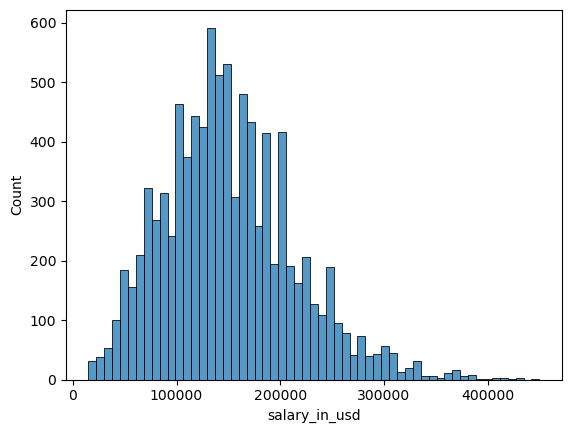

In [17]:
sns.histplot(df['salary_in_usd'])
plt.show()

From the above chart we can observe that the data is right skewed.

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

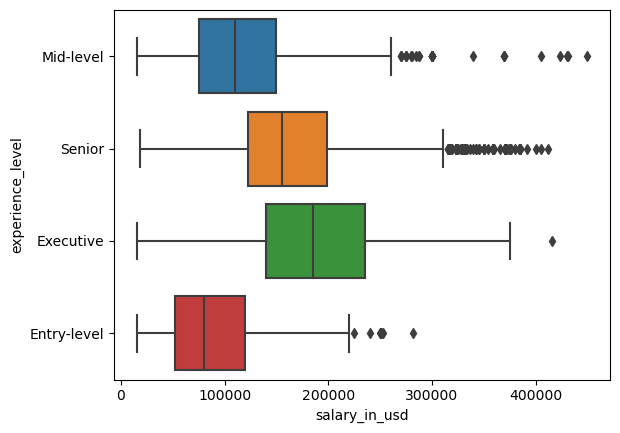

In [18]:
sns.boxplot(data = df, x = 'salary_in_usd', y = 'experience_level')

<Axes: xlabel='salary_in_usd', ylabel='employment_type'>

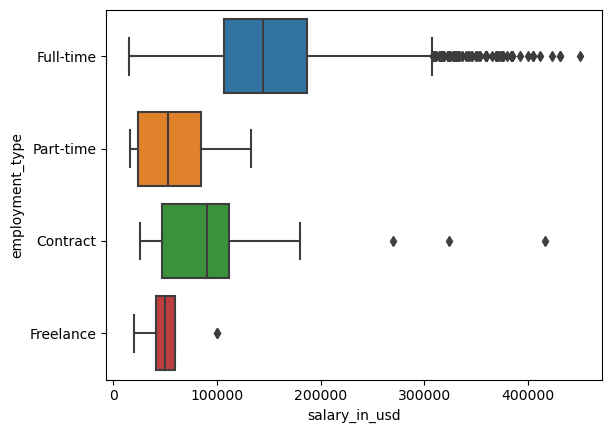

In [19]:
sns.boxplot(data = df, x = 'salary_in_usd', y = 'employment_type')

<Axes: xlabel='salary_in_usd', ylabel='work_setting'>

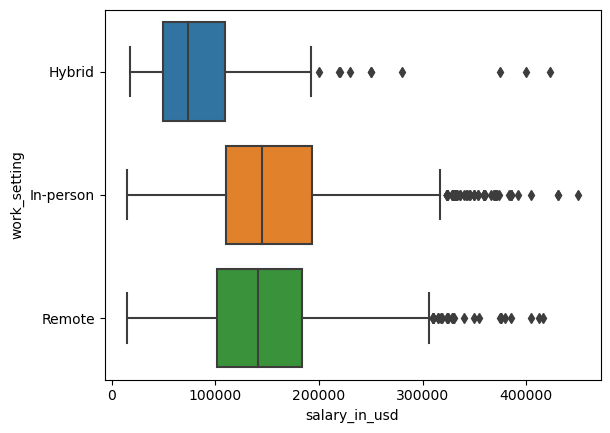

In [20]:
sns.boxplot(data = df, x = 'salary_in_usd', y = 'work_setting')

In [26]:
salary_by_job_category = df.groupby('job_category')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
salary_by_job_category

,job_category,salary_in_usd
7,Data Science and Research,3014
4,Data Engineering,2260
2,Data Analysis,1457
9,Machine Learning and AI,1428
8,Leadership and Management,503
0,BI and Visualization,313
3,Data Architecture and Modeling,259
5,Data Management and Strategy,61
6,Data Quality and Operations,55
1,Cloud and Database,5


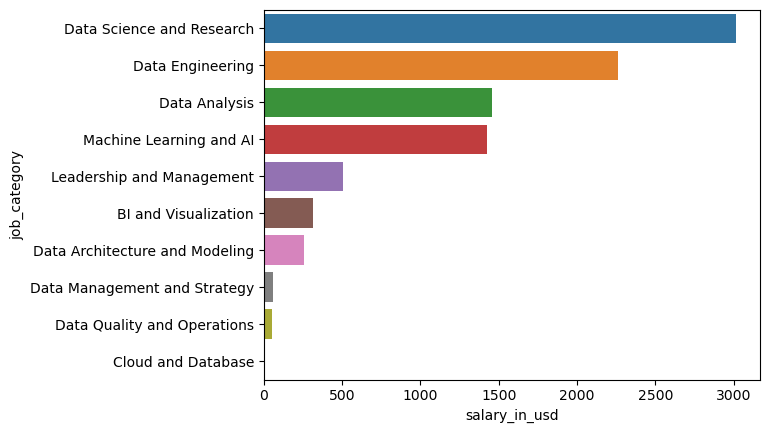

In [30]:
sns.barplot(data = salary_by_job_category, x = 'salary_in_usd', y = 'job_category')
plt.show()

From the above chart we can conclude that Data Science and Research	category is getting highest salary in USD. And Cloud and Database role is getting less salary in USD. 

In [34]:
salary_by_job_currency = df.groupby('salary_currency')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
salary_by_job_currency

,salary_currency,salary_in_usd
10,USD,8591
6,GBP,347
5,EUR,340
2,CAD,38
0,AUD,11
7,PLN,7
8,SGD,6
3,CHF,5
1,BRL,4
4,DKK,3


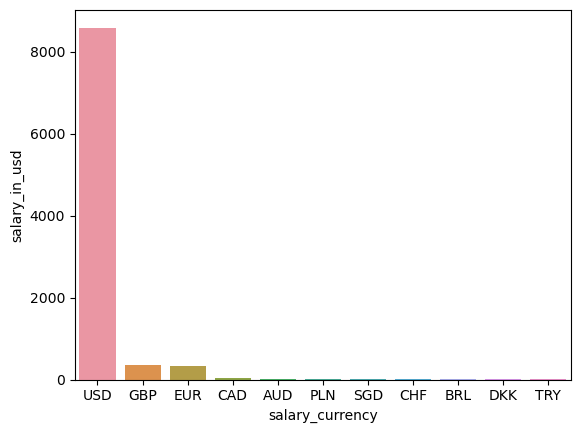

In [36]:
sns.barplot(data = salary_by_job_currency, x = 'salary_currency', y = 'salary_in_usd')
plt.show()

From the above chart we can observe that most of the employees are paid in USD.

In [38]:
salary_by_job_experience = df.groupby('experience_level')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
salary_by_job_experience

,experience_level,salary_in_usd
3,Senior,6709
2,Mid-level,1869
0,Entry-level,496
1,Executive,281


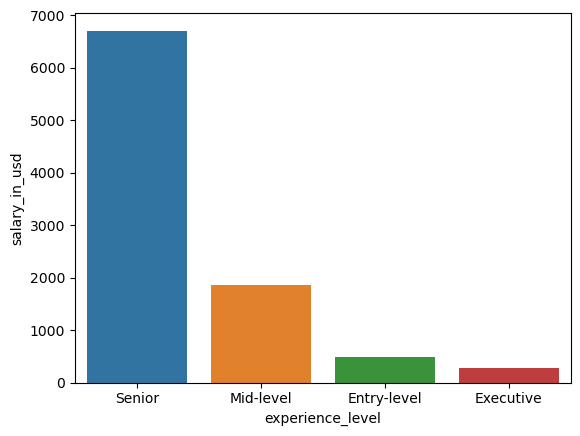

In [40]:
sns.barplot(data = salary_by_job_experience, x = 'experience_level', y = 'salary_in_usd')
plt.show()

From the above chart we can observe that most of the employees working in the company are senior.

In [41]:
salary_by_job_employment = df.groupby('employment_type')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
salary_by_job_employment

,employment_type,salary_in_usd
2,Full-time,9310
0,Contract,19
3,Part-time,15
1,Freelance,11


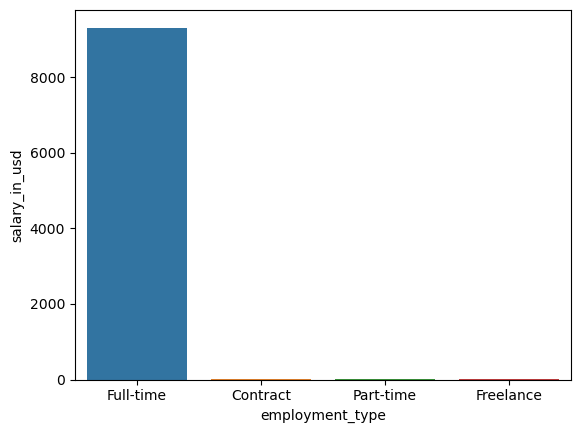

In [42]:
sns.barplot(data = salary_by_job_employment, x = 'employment_type', y = 'salary_in_usd')
plt.show()

Based on the above chart we can say that the maximum of the employees are full-time employees.

In [44]:
salary_by_job_location = df.groupby('company_location')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
salary_by_job_location

,company_location,salary_in_usd
69,United States,8132
68,United Kingdom,449
11,Canada,226
61,Spain,113
23,Germany,72
...,...,...
27,Honduras,1
29,Indonesia,1
1,American Samoa,1
30,Iran,1


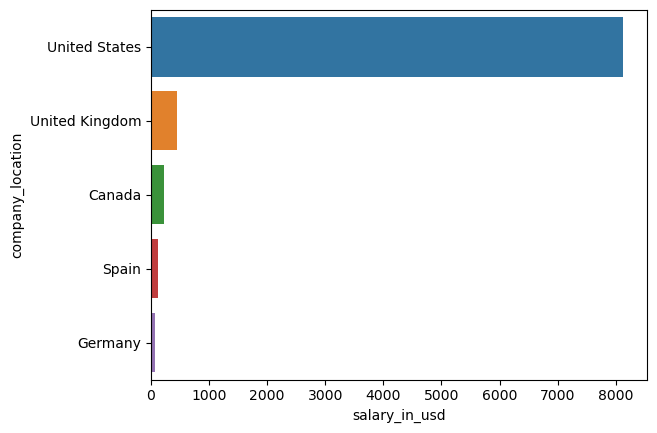

In [47]:
sns.barplot(data = salary_by_job_location.head(5), x = 'salary_in_usd', y = 'company_location')
plt.show()

Based on the above chart we can state that the maximum salary is paid in United States.

In [50]:
salary_by_job_size = df.groupby('company_size')['salary_in_usd'].count().reset_index().sort_values('salary_in_usd', ascending = False)
salary_by_job_size

,company_size,salary_in_usd
1,M,8448
0,L,748
2,S,159


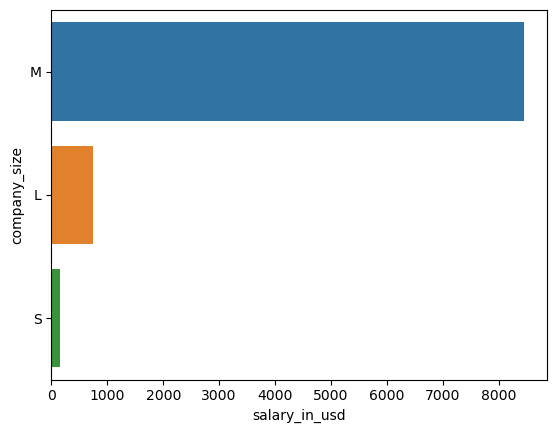

In [51]:
sns.barplot(data = salary_by_job_size.head(5), x = 'salary_in_usd', y = 'company_size')
plt.show()

From the above chart we can observe that maximum of employees(8448) are working in medium sized company.